мой датасет - https://www.kaggle.com/datasets/uciml/glass

RI: refractive index
Na: Sodium
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron

In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import random
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import metrics

### Регрессия - метод опорных векторов, линейная регрессия
### Классивфикация - метод ближайших соседей, простая классификация (лаб 10 у Влада, самый конец) https://github.com/VVoroshilov/ML_course/blob/main/seminar_10/Homework/seminar_10.ipynb

In [221]:
#1. Загрузить датасет в Python.
# Загружаем датасет
data = pd.read_csv('glass.csv')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### Датасет состоит из 10 столбцов
### Все атрибуты с численными типами данных

In [222]:
#2. Описать набор данных и решаемую задачу.
# Описание датасета
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


**Здесь мы видим, что все значения числовые, поэтому нам НЕ придется самим заменять значения на числовые (с помощью дамми-переменной, map, LabelEncoder и т.д.)**

In [223]:
print(data.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

In [224]:
# Смотрим, какие значения имеются в столбцах
for col_name in data.columns:
    print(f"Column Name: {col_name}")
    print(data[col_name].value_counts())
    print("-----------------")

Column Name: RI
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64
-----------------
Column Name: Na
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64
-----------------
Column Name: Mg
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64
-----------------
Column Name: Al
1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64
-----------------
Column Name: Si
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64
-----------------
Column Name: K
0.00    30
0.57    1

In [225]:
# Количество уникальных значений в столбцах
for col_name in data.columns:
    print(f"Column Name: {col_name}")
    print(data[col_name].nunique())
    print("-----------------")

Column Name: RI
178
-----------------
Column Name: Na
142
-----------------
Column Name: Mg
94
-----------------
Column Name: Al
118
-----------------
Column Name: Si
133
-----------------
Column Name: K
65
-----------------
Column Name: Ca
143
-----------------
Column Name: Ba
34
-----------------
Column Name: Fe
32
-----------------
Column Name: Type
6
-----------------


In [226]:
# Провека на пустые значения

for col_name in data.columns:
    print(f"Column Name: {col_name}")
    print(data[col_name].isnull().sum(), data[col_name].dtype)
    print("-----------------")

Column Name: RI
0 float64
-----------------
Column Name: Na
0 float64
-----------------
Column Name: Mg
0 float64
-----------------
Column Name: Al
0 float64
-----------------
Column Name: Si
0 float64
-----------------
Column Name: K
0 float64
-----------------
Column Name: Ca
0 float64
-----------------
Column Name: Ba
0 float64
-----------------
Column Name: Fe
0 float64
-----------------
Column Name: Type
0 int64
-----------------


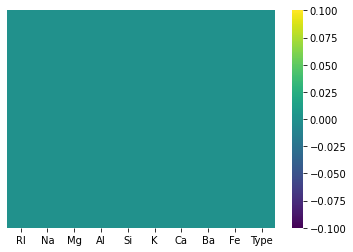

In [227]:
# Визуализация пустых значений
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis') 

Посмотрим распределение частоты данных в виде столбцов

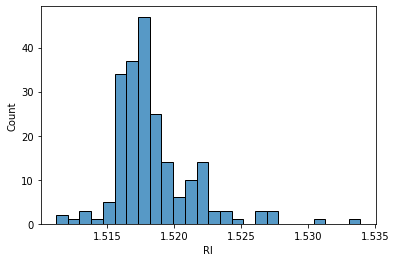

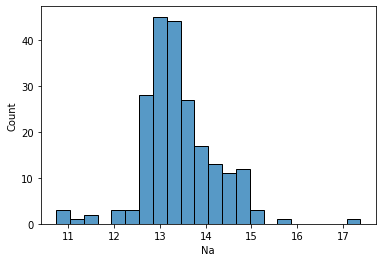

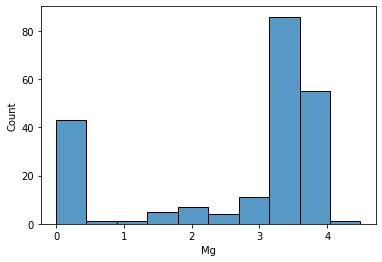

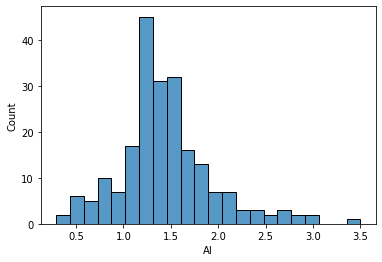

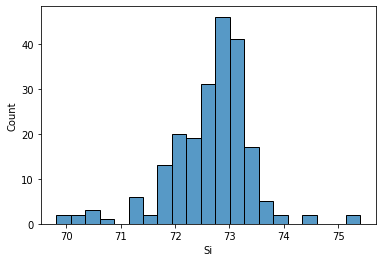

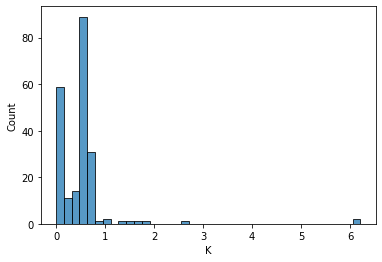

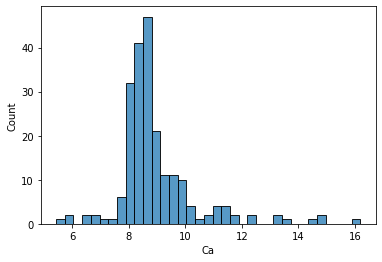

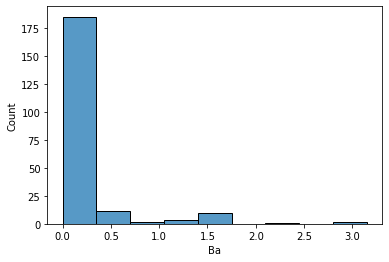

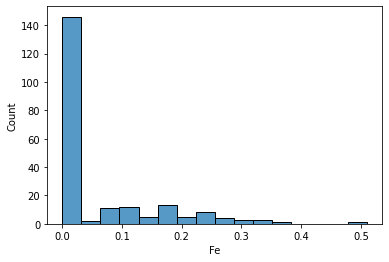

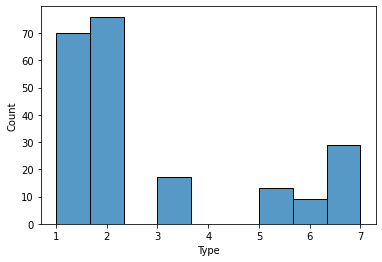

In [228]:
# Смотрим гистограммы до выкидывания выбросов. Распределение частоты данных в виде столбцов. Тут сможем определеить (как и на ящике с усами) аномальные значения
for col_name in data.columns:
    sns.histplot(data[col_name])
    plt.show()

In [229]:
# Провека на пустые значения

for col_name in data.columns:
    print(f"Column Name: {col_name}")
    print(data[col_name].isnull().sum(), data[col_name].dtype)
    print("-----------------")

Column Name: RI
0 float64
-----------------
Column Name: Na
0 float64
-----------------
Column Name: Mg
0 float64
-----------------
Column Name: Al
0 float64
-----------------
Column Name: Si
0 float64
-----------------
Column Name: K
0 float64
-----------------
Column Name: Ca
0 float64
-----------------
Column Name: Ba
0 float64
-----------------
Column Name: Fe
0 float64
-----------------
Column Name: Type
0 int64
-----------------


**Здесь мы видим, что в нашем датасете нет пустых значений, поэтому нам НЕ придется избавляться от нанов (удалять их или столбцы с преобладающим количеством пропусков, заменять их на значение медианы и тд)**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


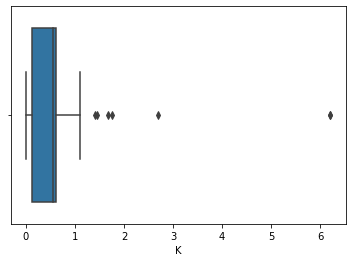

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


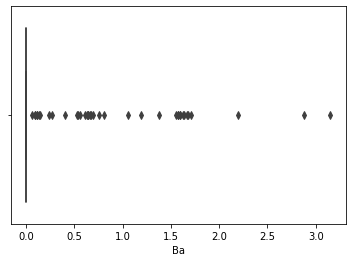

In [230]:
data_list = ["K","Ba"] 
for col_name in data_list:
  sns.boxplot(data[col_name])
  plt.show()

### В столбце  "K" больше всего значений в промежутке от 0 до 2. Остальные возможные значения представлены в очень маленьком количестве, поэтому мы их удалим из выборки, т.к. они либо являются аномалией, либо сущетсвуют в недостаточно большом количестве, чтобы модель могла делать предсказания с высокой точностью с такими значениями


In [231]:
data = data[(data["K"] <= 2) & (data["K"] > 0)]

### В столбце  "Ba" больше всего значений в промежутке от 0 до 2. Остальные возможные значения представлены в очень маленьком количестве, поэтому мы их удалим из выборки, т.к. они либо являются аномалией, либо сущетсвуют в недостаточно большом количестве, чтобы модель могла делать предсказания с высокой точностью с такими значениями


In [232]:
data = data[(data["Ba"] <= 2) & (data["Ba"] > 0)]

In [233]:
# Количество уникальных значений в столбцах
for col_name in data.columns:
    print(f"Column Name: {col_name}")
    print(data[col_name].nunique(), data[col_name].dtype)
    print("-----------------")

Column Name: RI
18 float64
-----------------
Column Name: Na
16 float64
-----------------
Column Name: Mg
14 float64
-----------------
Column Name: Al
17 float64
-----------------
Column Name: Si
18 float64
-----------------
Column Name: K
16 float64
-----------------
Column Name: Ca
18 float64
-----------------
Column Name: Ba
17 float64
-----------------
Column Name: Fe
9 float64
-----------------
Column Name: Type
5 int64
-----------------


In [234]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
32,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.09,0.22,1
36,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.00,1
61,1.51977,13.81,3.58,1.32,71.72,0.12,8.67,0.69,0.00,1
99,1.51811,12.96,2.96,1.43,72.92,0.60,8.79,0.14,0.00,2
100,1.51655,12.75,2.85,1.44,73.27,0.57,8.79,0.11,0.22,2
128,1.52068,13.55,2.09,1.67,72.18,0.53,9.57,0.27,0.17,2
141,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17,2
142,1.51662,12.85,3.51,1.44,73.01,0.68,8.23,0.06,0.25,2
161,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
174,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51,5


In [235]:
# 4. Разделите эти данные на тестовую и обучающую выборки
x = data.drop('Type', axis = 1) #факторные параметры
y = data['Type'] # целевая переменная


In [236]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = True)

In [237]:
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
61,1.51977,13.81,3.58,1.32,71.72,0.12,8.67,0.69,0.00
195,1.51545,14.14,0.00,2.68,73.39,0.08,9.07,0.61,0.05
100,1.51655,12.75,2.85,1.44,73.27,0.57,8.79,0.11,0.22
198,1.51531,14.38,0.00,2.66,73.10,0.04,9.08,0.64,0.00
142,1.51662,12.85,3.51,1.44,73.01,0.68,8.23,0.06,0.25
36,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.00
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09
32,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.09,0.22
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00
199,1.51609,15.01,0.00,2.51,73.05,0.05,8.83,0.53,0.00


In [238]:
y_test

99     2
196    7
141    2
185    7
Name: Type, dtype: int64

In [239]:
# Нормализация
x_train = MinMaxScaler().fit_transform(x_train) 
x_test = MinMaxScaler().fit_transform(x_test)

In [240]:
x_train

array([[0.53477218, 0.34868421, 1.        , 0.26760563, 0.42574257,
        0.05633803, 0.73657289, 0.38888889, 0.        ],
       [0.01678657, 0.45723684, 0.        , 0.90610329, 0.97689769,
        0.02816901, 0.83887468, 0.33950617, 0.09803922],
       [0.14868106, 0.        , 0.79608939, 0.32394366, 0.93729373,
        0.37323944, 0.76726343, 0.0308642 , 0.43137255],
       [0.        , 0.53618421, 0.        , 0.89671362, 0.88118812,
        0.        , 0.84143223, 0.35802469, 0.        ],
       [0.15707434, 0.03289474, 0.98044693, 0.32394366, 0.85148515,
        0.45070423, 0.62404092, 0.        , 0.49019608],
       [0.45323741, 0.375     , 0.98603352, 0.26760563, 0.45544554,
        0.33098592, 0.76470588, 0.0308642 , 0.        ],
       [0.11031175, 0.47697368, 0.        , 0.95774648, 1.        ,
        0.        , 0.83120205, 0.20987654, 0.17647059],
       [0.29256595, 0.03289474, 0.97206704, 0.22535211, 0.83828383,
        0.40140845, 0.7084399 , 0.01851852, 0.43137255],


Постройте модель классификации для определения Type



In [241]:
cls = LogisticRegression() #логистическая регрессия (LogisticRegression)
scores = cross_validate(cls, x_train, y_train, cv=5)
print(scores["test_score"])
np.mean(scores["test_score"])

[0.66666667 0.33333333 0.33333333 0.66666667 0.        ]


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.4

In [242]:
svc = SVC() #метод опорных векторов с линейным ядром (SVC(kernel='linear'))
scores = cross_validate(svc, x_train, y_train, cv=5)
print(scores["test_score"])
np.mean(scores["test_score"])

[1.         1.         0.33333333 0.66666667 0.        ]


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.6

In [243]:
lda = LinearDiscriminantAnalysis() #метод линейного дискриминантного анализа (LinearDiscriminantAnalysis)
scores = cross_validate(lda, x_train, y_train, cv=5)
print(scores["test_score"])
np.mean(scores["test_score"])

[0.33333333 0.66666667 0.66666667 0.66666667 0.33333333]


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.5333333333333333

In [244]:
knn = KNeighborsClassifier() #метод k ближайших соседей (KNeighborsClassifier с двумя классами)
scores = cross_validate(knn, x_train, y_train, cv=5)
print(scores["test_score"])
np.mean(scores["test_score"])

[0.66666667 0.66666667 0.66666667 0.66666667 0.        ]


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.5333333333333333

### По результатам кросс-валидации, наилучший результат показала модель логистической регрессии

# Оцените качество модели на тестовой выборке с помощью следующих метрик:


достоверность предсказания (accuracy); точность (precision); полнота (recall);



In [245]:
svc = LogisticRegression() #логистическая регрессия
svc.fit(x_train, y_train)

LogisticRegression()

In [246]:
y_pred = svc.predict(x_test)
metrics.confusion_matrix(y_test, y_pred)

array([[0, 0, 0],
       [2, 0, 0],
       [0, 0, 2]])

In [247]:
#Метрика достоверности предсказания:
metrics.accuracy_score(y_test, y_pred)

0.5

In [248]:
#Метрика точности:
metrics.precision_score(y_test, y_pred, pos_label=1, average='micro')

0.5

In [249]:
#Метрика полноты:
metrics.recall_score(y_test, y_pred,  pos_label=1, average='micro')

0.5

Text(0.5, 15.0, 'Предсказанные значения')

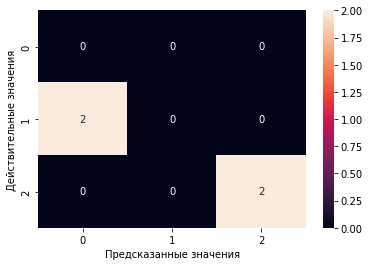

In [250]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)), # оцениваем точность классификации
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')